In [45]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.utils import plot_model

In [2]:
#Load FIFA 2020 stats file
fifa20ds = pd.read_csv('players_20.csv')

In [3]:
#Show the head of the file to check if it the correct file
fifa20ds.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
fifa20ds.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [5]:
#print ll column names to facilitate the feature selection
for c in fifa20ds.columns:
    print(c)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

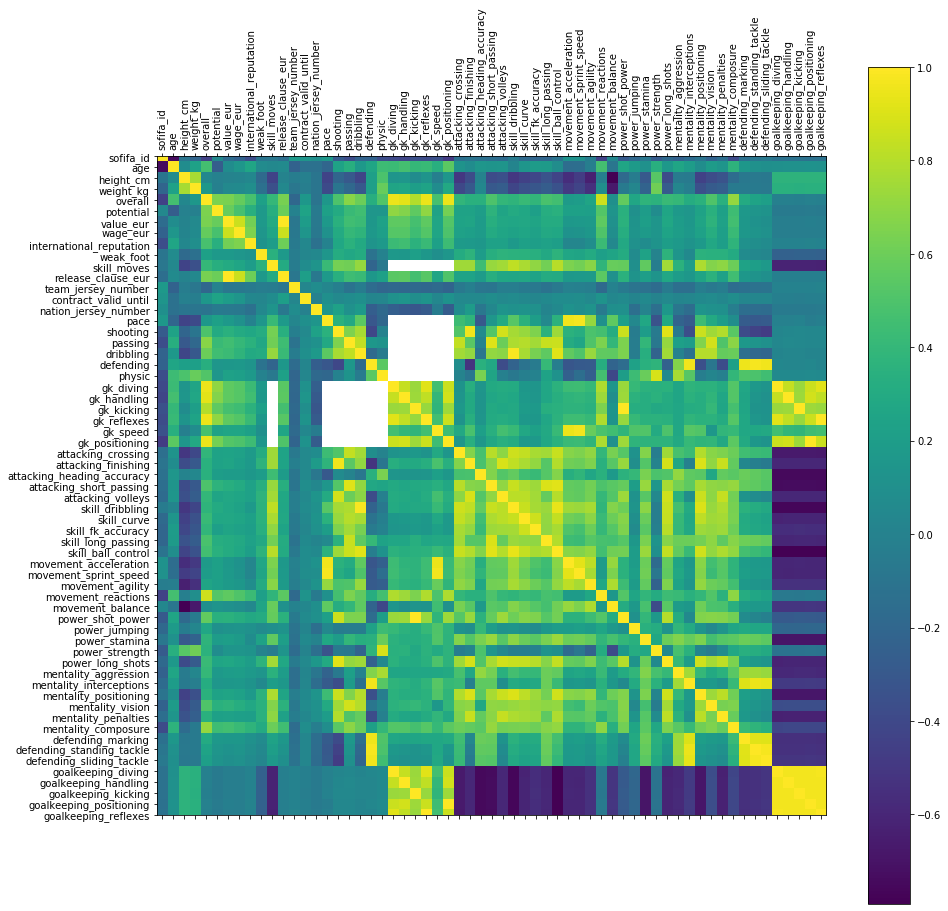

In [6]:
#Create Correlation Matrx and show it as heat map
corr = fifa20ds.corr()
plt.figure(figsize=(15,15))
plt.matshow(corr,fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation= 90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [7]:
#select features to use depending on their correlation to our label
features = ['overall',
            'international_reputation',
            'potential',
            'age',
            'height_cm',
            'weight_kg',
            'skill_moves',
            'weak_foot',
            'attacking_crossing',
            'attacking_finishing',
            'attacking_heading_accuracy',
            'attacking_short_passing',
            'attacking_volleys',
            'skill_dribbling',
            'skill_curve',
            'skill_fk_accuracy',
            'skill_long_passing',
            'skill_ball_control',
            'movement_acceleration',
            'movement_sprint_speed',
            'movement_agility',
            'movement_reactions',
            'movement_balance',
            'power_shot_power',
            'power_jumping',
            'power_stamina',
            'power_strength',
            'power_long_shots',
            'mentality_aggression',
            'mentality_interceptions',
            'mentality_positioning',
            'mentality_vision',
            'mentality_penalties',
            'mentality_composure',
            'defending_marking',
            'defending_standing_tackle',
            'defending_sliding_tackle',
            'goalkeeping_diving',
            'goalkeeping_handling',
            'goalkeeping_kicking',
            'goalkeeping_positioning',
            'goalkeeping_reflexes']

In [8]:
#Create dataset with all the selected features
X = fifa20ds[features]
X.shape

(18278, 42)

In [11]:
#Create dataset with the target label
Y = fifa20ds['value_eur']
Y.shape

(18278,)

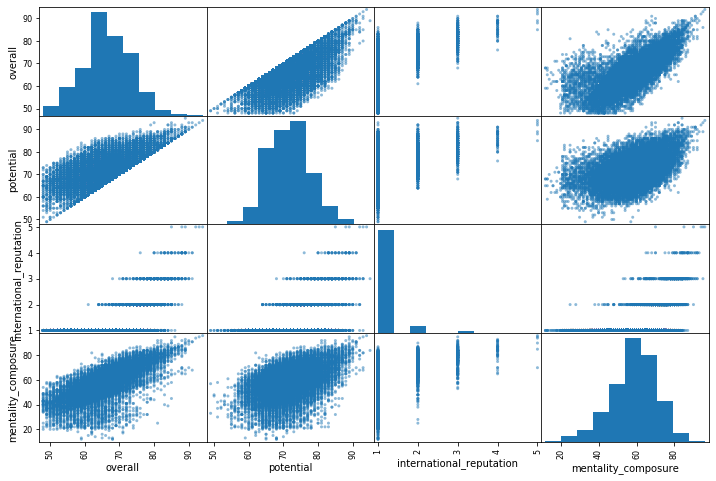

In [18]:
#Data Visualization
attributes = ["overall", "potential","international_reputation", "mentality_composure"]
scatter_matrix(X[attributes], figsize=(12, 8))
plt.show()

In [19]:
#Convert dataset to numpy element  
x_ff20 = X.to_numpy()
x_ff20.shape

(18278, 42)

In [20]:
#Convert dataset to numpy element
y_ff20 = Y.to_numpy()
#Flat label dataset
y_ff20 = np.reshape(y_ff20, (-1,1))
y_ff20.shape

(18278, 1)

In [21]:
#Normalized data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x_ff20))
xscale=scaler_x.transform(x_ff20)
print(scaler_y.fit(y_ff20))
yscale=scaler_y.transform(y_ff20)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [22]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.2, random_state = 142)

In [23]:
#Create Model
model = Sequential()
model.add(Dense(16, input_dim=42, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                688       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


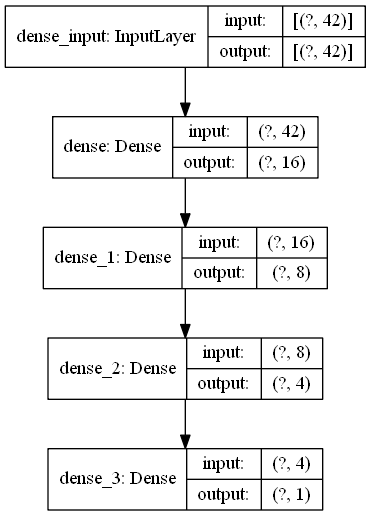

In [24]:
#Visualize Model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
#Set loss and optimizer
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [26]:
#Fit Model
history = model.fit(X_train, y_train, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)

Train on 11697 samples, validate on 2925 samples
Epoch 1/1000
11697/11697 [==============================] - 1s 90us/sample - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0208 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0183
Epoch 2/1000
11697/11697 [==============================] - 1s 65us/sample - loss: 9.2740e-04 - mean_squared_error: 9.2740e-04 - mean_absolute_error: 0.0170 - val_loss: 8.5880e-04 - val_mean_squared_error: 8.5880e-04 - val_mean_absolute_error: 0.0156
Epoch 3/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 7.3293e-04 - mean_squared_error: 7.3293e-04 - mean_absolute_error: 0.0149 - val_loss: 9.9084e-04 - val_mean_squared_error: 9.9084e-04 - val_mean_absolute_error: 0.0191
Epoch 4/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 6.4104e-04 - mean_squared_error: 6.4104e-04 - mean_absolute_error: 0.0139 - val_loss: 6.4943e-04 - val_mean_squared_error: 6.4943e-

11697/11697 [==============================] - 1s 49us/sample - loss: 1.5132e-04 - mean_squared_error: 1.5132e-04 - mean_absolute_error: 0.0063 - val_loss: 2.1778e-04 - val_mean_squared_error: 2.1778e-04 - val_mean_absolute_error: 0.0064
Epoch 34/1000
11697/11697 [==============================] - 1s 52us/sample - loss: 1.6295e-04 - mean_squared_error: 1.6295e-04 - mean_absolute_error: 0.0067 - val_loss: 1.0648e-04 - val_mean_squared_error: 1.0648e-04 - val_mean_absolute_error: 0.0047
Epoch 35/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 2.0831e-04 - mean_squared_error: 2.0831e-04 - mean_absolute_error: 0.0083 - val_loss: 3.1307e-04 - val_mean_squared_error: 3.1307e-04 - val_mean_absolute_error: 0.0072
Epoch 36/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 1.2059e-04 - mean_squared_error: 1.2059e-04 - mean_absolute_error: 0.0058 - val_loss: 9.1535e-05 - val_mean_squared_error: 9.1535e-05 - val_mean_absolute_error: 0.0046
Epoch 

11697/11697 [==============================] - 1s 70us/sample - loss: 1.2936e-04 - mean_squared_error: 1.2936e-04 - mean_absolute_error: 0.0053 - val_loss: 8.0057e-04 - val_mean_squared_error: 8.0057e-04 - val_mean_absolute_error: 0.0127
Epoch 66/1000
11697/11697 [==============================] - 1s 58us/sample - loss: 1.2585e-04 - mean_squared_error: 1.2585e-04 - mean_absolute_error: 0.0052 - val_loss: 1.6752e-04 - val_mean_squared_error: 1.6752e-04 - val_mean_absolute_error: 0.0070
Epoch 67/1000
11697/11697 [==============================] - 1s 44us/sample - loss: 1.3598e-04 - mean_squared_error: 1.3598e-04 - mean_absolute_error: 0.0056 - val_loss: 1.0761e-04 - val_mean_squared_error: 1.0761e-04 - val_mean_absolute_error: 0.0048
Epoch 68/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 1.0100e-04 - mean_squared_error: 1.0100e-04 - mean_absolute_error: 0.0047 - val_loss: 1.1338e-04 - val_mean_squared_error: 1.1338e-04 - val_mean_absolute_error: 0.0050
Epoch 

11697/11697 [==============================] - 1s 49us/sample - loss: 1.1416e-04 - mean_squared_error: 1.1416e-04 - mean_absolute_error: 0.0051 - val_loss: 1.6257e-04 - val_mean_squared_error: 1.6257e-04 - val_mean_absolute_error: 0.0059
Epoch 98/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 1.0245e-04 - mean_squared_error: 1.0245e-04 - mean_absolute_error: 0.0049 - val_loss: 8.0491e-05 - val_mean_squared_error: 8.0491e-05 - val_mean_absolute_error: 0.0043
Epoch 99/1000
11697/11697 [==============================] - 1s 44us/sample - loss: 9.0665e-05 - mean_squared_error: 9.0665e-05 - mean_absolute_error: 0.0045 - val_loss: 8.8077e-05 - val_mean_squared_error: 8.8077e-05 - val_mean_absolute_error: 0.0053
Epoch 100/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 9.2872e-05 - mean_squared_error: 9.2872e-05 - mean_absolute_error: 0.0045 - val_loss: 7.3138e-05 - val_mean_squared_error: 7.3138e-05 - val_mean_absolute_error: 0.0039
Epoch

11697/11697 [==============================] - 0s 42us/sample - loss: 9.6699e-05 - mean_squared_error: 9.6699e-05 - mean_absolute_error: 0.0045 - val_loss: 2.1072e-04 - val_mean_squared_error: 2.1072e-04 - val_mean_absolute_error: 0.0059
Epoch 130/1000
11697/11697 [==============================] - 1s 56us/sample - loss: 8.9007e-05 - mean_squared_error: 8.9007e-05 - mean_absolute_error: 0.0044 - val_loss: 9.9334e-05 - val_mean_squared_error: 9.9334e-05 - val_mean_absolute_error: 0.0040
Epoch 131/1000
11697/11697 [==============================] - 1s 61us/sample - loss: 9.3556e-05 - mean_squared_error: 9.3556e-05 - mean_absolute_error: 0.0046 - val_loss: 8.5609e-05 - val_mean_squared_error: 8.5609e-05 - val_mean_absolute_error: 0.0036
Epoch 132/1000
11697/11697 [==============================] - 0s 41us/sample - loss: 7.2101e-05 - mean_squared_error: 7.2101e-05 - mean_absolute_error: 0.0039 - val_loss: 2.0268e-04 - val_mean_squared_error: 2.0268e-04 - val_mean_absolute_error: 0.0080
Epo

11697/11697 [==============================] - 1s 45us/sample - loss: 9.9770e-05 - mean_squared_error: 9.9770e-05 - mean_absolute_error: 0.0048 - val_loss: 7.9280e-05 - val_mean_squared_error: 7.9280e-05 - val_mean_absolute_error: 0.0038
Epoch 162/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 7.0117e-05 - mean_squared_error: 7.0117e-05 - mean_absolute_error: 0.0040 - val_loss: 6.6625e-05 - val_mean_squared_error: 6.6625e-05 - val_mean_absolute_error: 0.0033
Epoch 163/1000
11697/11697 [==============================] - 0s 43us/sample - loss: 7.7063e-05 - mean_squared_error: 7.7063e-05 - mean_absolute_error: 0.0040 - val_loss: 8.1657e-05 - val_mean_squared_error: 8.1657e-05 - val_mean_absolute_error: 0.0036
Epoch 164/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 9.3271e-05 - mean_squared_error: 9.3271e-05 - mean_absolute_error: 0.0042 - val_loss: 1.7742e-04 - val_mean_squared_error: 1.7742e-04 - val_mean_absolute_error: 0.0061
Epo

11697/11697 [==============================] - 1s 47us/sample - loss: 8.0868e-05 - mean_squared_error: 8.0868e-05 - mean_absolute_error: 0.0043 - val_loss: 9.2063e-05 - val_mean_squared_error: 9.2063e-05 - val_mean_absolute_error: 0.0034
Epoch 194/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 6.0909e-05 - mean_squared_error: 6.0909e-05 - mean_absolute_error: 0.0034 - val_loss: 4.8402e-05 - val_mean_squared_error: 4.8402e-05 - val_mean_absolute_error: 0.0026
Epoch 195/1000
11697/11697 [==============================] - 1s 57us/sample - loss: 5.3867e-05 - mean_squared_error: 5.3867e-05 - mean_absolute_error: 0.0032 - val_loss: 5.3372e-05 - val_mean_squared_error: 5.3372e-05 - val_mean_absolute_error: 0.0031
Epoch 196/1000
11697/11697 [==============================] - 1s 53us/sample - loss: 6.8940e-05 - mean_squared_error: 6.8940e-05 - mean_absolute_error: 0.0036 - val_loss: 6.3499e-05 - val_mean_squared_error: 6.3499e-05 - val_mean_absolute_error: 0.0028
Epo

11697/11697 [==============================] - 1s 50us/sample - loss: 8.3874e-05 - mean_squared_error: 8.3874e-05 - mean_absolute_error: 0.0039 - val_loss: 4.1666e-05 - val_mean_squared_error: 4.1666e-05 - val_mean_absolute_error: 0.0027
Epoch 226/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 4.9178e-05 - mean_squared_error: 4.9178e-05 - mean_absolute_error: 0.0029 - val_loss: 4.8670e-05 - val_mean_squared_error: 4.8670e-05 - val_mean_absolute_error: 0.0024
Epoch 227/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 4.2412e-05 - mean_squared_error: 4.2412e-05 - mean_absolute_error: 0.0029 - val_loss: 5.3374e-05 - val_mean_squared_error: 5.3374e-05 - val_mean_absolute_error: 0.0033
Epoch 228/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 8.3967e-05 - mean_squared_error: 8.3967e-05 - mean_absolute_error: 0.0038 - val_loss: 7.8449e-05 - val_mean_squared_error: 7.8449e-05 - val_mean_absolute_error: 0.0035
Epo

11697/11697 [==============================] - 1s 50us/sample - loss: 5.9543e-05 - mean_squared_error: 5.9543e-05 - mean_absolute_error: 0.0036 - val_loss: 5.8488e-05 - val_mean_squared_error: 5.8488e-05 - val_mean_absolute_error: 0.0027
Epoch 258/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 5.8707e-05 - mean_squared_error: 5.8707e-05 - mean_absolute_error: 0.0033 - val_loss: 3.8463e-05 - val_mean_squared_error: 3.8463e-05 - val_mean_absolute_error: 0.0021
Epoch 259/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 6.1272e-05 - mean_squared_error: 6.1272e-05 - mean_absolute_error: 0.0035 - val_loss: 4.1180e-05 - val_mean_squared_error: 4.1180e-05 - val_mean_absolute_error: 0.0023
Epoch 260/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 4.1173e-05 - mean_squared_error: 4.1173e-05 - mean_absolute_error: 0.0026 - val_loss: 7.1484e-05 - val_mean_squared_error: 7.1484e-05 - val_mean_absolute_error: 0.0035
Epo

11697/11697 [==============================] - 1s 51us/sample - loss: 5.7857e-05 - mean_squared_error: 5.7857e-05 - mean_absolute_error: 0.0033 - val_loss: 4.9391e-05 - val_mean_squared_error: 4.9391e-05 - val_mean_absolute_error: 0.0026
Epoch 290/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 4.2861e-05 - mean_squared_error: 4.2861e-05 - mean_absolute_error: 0.0028 - val_loss: 5.1171e-05 - val_mean_squared_error: 5.1171e-05 - val_mean_absolute_error: 0.0029
Epoch 291/1000
11697/11697 [==============================] - 1s 46us/sample - loss: 5.3744e-05 - mean_squared_error: 5.3744e-05 - mean_absolute_error: 0.0033 - val_loss: 4.5691e-05 - val_mean_squared_error: 4.5691e-05 - val_mean_absolute_error: 0.0026
Epoch 292/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 5.2333e-05 - mean_squared_error: 5.2333e-05 - mean_absolute_error: 0.0033 - val_loss: 5.9893e-05 - val_mean_squared_error: 5.9893e-05 - val_mean_absolute_error: 0.0047
Epo

11697/11697 [==============================] - 1s 60us/sample - loss: 3.7296e-05 - mean_squared_error: 3.7296e-05 - mean_absolute_error: 0.0025 - val_loss: 4.1368e-05 - val_mean_squared_error: 4.1368e-05 - val_mean_absolute_error: 0.0022
Epoch 322/1000
11697/11697 [==============================] - 1s 50us/sample - loss: 5.2944e-05 - mean_squared_error: 5.2944e-05 - mean_absolute_error: 0.0032 - val_loss: 5.4312e-05 - val_mean_squared_error: 5.4312e-05 - val_mean_absolute_error: 0.0026
Epoch 323/1000
11697/11697 [==============================] - 1s 50us/sample - loss: 3.8950e-05 - mean_squared_error: 3.8950e-05 - mean_absolute_error: 0.0027 - val_loss: 4.2462e-05 - val_mean_squared_error: 4.2462e-05 - val_mean_absolute_error: 0.0024
Epoch 324/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 4.8758e-05 - mean_squared_error: 4.8758e-05 - mean_absolute_error: 0.0031 - val_loss: 5.2079e-05 - val_mean_squared_error: 5.2079e-05 - val_mean_absolute_error: 0.0024
Epo

11697/11697 [==============================] - 1s 46us/sample - loss: 6.7611e-05 - mean_squared_error: 6.7611e-05 - mean_absolute_error: 0.0038 - val_loss: 4.6785e-05 - val_mean_squared_error: 4.6785e-05 - val_mean_absolute_error: 0.0027
Epoch 354/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 3.6582e-05 - mean_squared_error: 3.6582e-05 - mean_absolute_error: 0.0026 - val_loss: 4.5767e-05 - val_mean_squared_error: 4.5767e-05 - val_mean_absolute_error: 0.0023
Epoch 355/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 6.3288e-05 - mean_squared_error: 6.3288e-05 - mean_absolute_error: 0.0034 - val_loss: 4.9693e-05 - val_mean_squared_error: 4.9693e-05 - val_mean_absolute_error: 0.0026
Epoch 356/1000
11697/11697 [==============================] - 1s 46us/sample - loss: 5.4192e-05 - mean_squared_error: 5.4192e-05 - mean_absolute_error: 0.0034 - val_loss: 4.1444e-05 - val_mean_squared_error: 4.1444e-05 - val_mean_absolute_error: 0.0028
Epo

11697/11697 [==============================] - 1s 48us/sample - loss: 4.3774e-05 - mean_squared_error: 4.3774e-05 - mean_absolute_error: 0.0028 - val_loss: 1.0790e-04 - val_mean_squared_error: 1.0790e-04 - val_mean_absolute_error: 0.0048
Epoch 386/1000
11697/11697 [==============================] - 1s 50us/sample - loss: 4.0839e-05 - mean_squared_error: 4.0839e-05 - mean_absolute_error: 0.0027 - val_loss: 4.3620e-05 - val_mean_squared_error: 4.3620e-05 - val_mean_absolute_error: 0.0022
Epoch 387/1000
11697/11697 [==============================] - 1s 62us/sample - loss: 4.3661e-05 - mean_squared_error: 4.3661e-05 - mean_absolute_error: 0.0029 - val_loss: 3.9757e-05 - val_mean_squared_error: 3.9757e-05 - val_mean_absolute_error: 0.0021
Epoch 388/1000
11697/11697 [==============================] - 1s 59us/sample - loss: 3.8186e-05 - mean_squared_error: 3.8186e-05 - mean_absolute_error: 0.0026 - val_loss: 4.0089e-05 - val_mean_squared_error: 4.0089e-05 - val_mean_absolute_error: 0.0023
Epo

11697/11697 [==============================] - 1s 49us/sample - loss: 4.1462e-05 - mean_squared_error: 4.1462e-05 - mean_absolute_error: 0.0028 - val_loss: 6.2515e-05 - val_mean_squared_error: 6.2515e-05 - val_mean_absolute_error: 0.0031
Epoch 418/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 4.6310e-05 - mean_squared_error: 4.6310e-05 - mean_absolute_error: 0.0031 - val_loss: 5.0869e-05 - val_mean_squared_error: 5.0869e-05 - val_mean_absolute_error: 0.0026
Epoch 419/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 4.6251e-05 - mean_squared_error: 4.6252e-05 - mean_absolute_error: 0.0029 - val_loss: 4.0904e-05 - val_mean_squared_error: 4.0904e-05 - val_mean_absolute_error: 0.0024
Epoch 420/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 4.4353e-05 - mean_squared_error: 4.4353e-05 - mean_absolute_error: 0.0030 - val_loss: 5.0730e-05 - val_mean_squared_error: 5.0730e-05 - val_mean_absolute_error: 0.0033
Epo

11697/11697 [==============================] - 1s 49us/sample - loss: 3.9378e-05 - mean_squared_error: 3.9378e-05 - mean_absolute_error: 0.0026 - val_loss: 5.0220e-05 - val_mean_squared_error: 5.0220e-05 - val_mean_absolute_error: 0.0026
Epoch 450/1000
11697/11697 [==============================] - 1s 46us/sample - loss: 3.5232e-05 - mean_squared_error: 3.5232e-05 - mean_absolute_error: 0.0025 - val_loss: 4.5815e-05 - val_mean_squared_error: 4.5815e-05 - val_mean_absolute_error: 0.0028
Epoch 451/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 5.8789e-05 - mean_squared_error: 5.8789e-05 - mean_absolute_error: 0.0033 - val_loss: 8.2404e-05 - val_mean_squared_error: 8.2404e-05 - val_mean_absolute_error: 0.0037
Epoch 452/1000
11697/11697 [==============================] - 1s 60us/sample - loss: 3.4930e-05 - mean_squared_error: 3.4930e-05 - mean_absolute_error: 0.0024 - val_loss: 4.0072e-05 - val_mean_squared_error: 4.0072e-05 - val_mean_absolute_error: 0.0027
Epo

11697/11697 [==============================] - 1s 55us/sample - loss: 5.4586e-05 - mean_squared_error: 5.4586e-05 - mean_absolute_error: 0.0036 - val_loss: 4.1085e-05 - val_mean_squared_error: 4.1085e-05 - val_mean_absolute_error: 0.0029
Epoch 482/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.7382e-05 - mean_squared_error: 3.7382e-05 - mean_absolute_error: 0.0025 - val_loss: 4.2139e-05 - val_mean_squared_error: 4.2139e-05 - val_mean_absolute_error: 0.0026
Epoch 483/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 3.6015e-05 - mean_squared_error: 3.6015e-05 - mean_absolute_error: 0.0025 - val_loss: 5.6560e-05 - val_mean_squared_error: 5.6560e-05 - val_mean_absolute_error: 0.0033
Epoch 484/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.8670e-05 - mean_squared_error: 3.8670e-05 - mean_absolute_error: 0.0027 - val_loss: 4.3635e-05 - val_mean_squared_error: 4.3635e-05 - val_mean_absolute_error: 0.0021
Epo

11697/11697 [==============================] - 1s 47us/sample - loss: 4.0996e-05 - mean_squared_error: 4.0996e-05 - mean_absolute_error: 0.0027 - val_loss: 4.6759e-05 - val_mean_squared_error: 4.6759e-05 - val_mean_absolute_error: 0.0026
Epoch 514/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 3.9858e-05 - mean_squared_error: 3.9858e-05 - mean_absolute_error: 0.0029 - val_loss: 7.4222e-05 - val_mean_squared_error: 7.4222e-05 - val_mean_absolute_error: 0.0043
Epoch 515/1000
11697/11697 [==============================] - 0s 42us/sample - loss: 3.5441e-05 - mean_squared_error: 3.5441e-05 - mean_absolute_error: 0.0025 - val_loss: 4.4785e-05 - val_mean_squared_error: 4.4785e-05 - val_mean_absolute_error: 0.0024
Epoch 516/1000
11697/11697 [==============================] - 1s 60us/sample - loss: 3.8866e-05 - mean_squared_error: 3.8866e-05 - mean_absolute_error: 0.0028 - val_loss: 5.4776e-05 - val_mean_squared_error: 5.4776e-05 - val_mean_absolute_error: 0.0032
Epo

11697/11697 [==============================] - 1s 62us/sample - loss: 4.8462e-05 - mean_squared_error: 4.8462e-05 - mean_absolute_error: 0.0031 - val_loss: 4.8006e-05 - val_mean_squared_error: 4.8006e-05 - val_mean_absolute_error: 0.0035
Epoch 546/1000
11697/11697 [==============================] - 1s 59us/sample - loss: 3.9967e-05 - mean_squared_error: 3.9967e-05 - mean_absolute_error: 0.0027 - val_loss: 7.0370e-05 - val_mean_squared_error: 7.0370e-05 - val_mean_absolute_error: 0.0033
Epoch 547/1000
11697/11697 [==============================] - 0s 37us/sample - loss: 3.4422e-05 - mean_squared_error: 3.4422e-05 - mean_absolute_error: 0.0025 - val_loss: 4.5045e-05 - val_mean_squared_error: 4.5045e-05 - val_mean_absolute_error: 0.0025
Epoch 548/1000
11697/11697 [==============================] - 1s 44us/sample - loss: 3.5195e-05 - mean_squared_error: 3.5195e-05 - mean_absolute_error: 0.0026 - val_loss: 4.3749e-05 - val_mean_squared_error: 4.3749e-05 - val_mean_absolute_error: 0.0024
Epo

11697/11697 [==============================] - 1s 48us/sample - loss: 3.5835e-05 - mean_squared_error: 3.5835e-05 - mean_absolute_error: 0.0026 - val_loss: 3.6067e-05 - val_mean_squared_error: 3.6067e-05 - val_mean_absolute_error: 0.0023
Epoch 578/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.4157e-05 - mean_squared_error: 3.4157e-05 - mean_absolute_error: 0.0025 - val_loss: 3.9181e-05 - val_mean_squared_error: 3.9181e-05 - val_mean_absolute_error: 0.0026
Epoch 579/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 3.5519e-05 - mean_squared_error: 3.5519e-05 - mean_absolute_error: 0.0027 - val_loss: 3.5590e-05 - val_mean_squared_error: 3.5590e-05 - val_mean_absolute_error: 0.0025
Epoch 580/1000
11697/11697 [==============================] - 1s 58us/sample - loss: 4.0152e-05 - mean_squared_error: 4.0152e-05 - mean_absolute_error: 0.0028 - val_loss: 4.5799e-05 - val_mean_squared_error: 4.5799e-05 - val_mean_absolute_error: 0.0028
Epo

11697/11697 [==============================] - 1s 52us/sample - loss: 3.1788e-05 - mean_squared_error: 3.1788e-05 - mean_absolute_error: 0.0024 - val_loss: 3.1692e-05 - val_mean_squared_error: 3.1692e-05 - val_mean_absolute_error: 0.0021
Epoch 610/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.9580e-05 - mean_squared_error: 3.9580e-05 - mean_absolute_error: 0.0027 - val_loss: 3.6164e-05 - val_mean_squared_error: 3.6164e-05 - val_mean_absolute_error: 0.0024
Epoch 611/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.2323e-05 - mean_squared_error: 3.2323e-05 - mean_absolute_error: 0.0024 - val_loss: 2.7671e-05 - val_mean_squared_error: 2.7671e-05 - val_mean_absolute_error: 0.0022
Epoch 612/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 3.0823e-05 - mean_squared_error: 3.0823e-05 - mean_absolute_error: 0.0024 - val_loss: 4.8221e-05 - val_mean_squared_error: 4.8221e-05 - val_mean_absolute_error: 0.0024
Epo

11697/11697 [==============================] - 1s 50us/sample - loss: 3.4269e-05 - mean_squared_error: 3.4269e-05 - mean_absolute_error: 0.0025 - val_loss: 3.0931e-05 - val_mean_squared_error: 3.0931e-05 - val_mean_absolute_error: 0.0021
Epoch 642/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.1852e-05 - mean_squared_error: 3.1852e-05 - mean_absolute_error: 0.0024 - val_loss: 6.3597e-05 - val_mean_squared_error: 6.3597e-05 - val_mean_absolute_error: 0.0035
Epoch 643/1000
11697/11697 [==============================] - 1s 46us/sample - loss: 4.4094e-05 - mean_squared_error: 4.4094e-05 - mean_absolute_error: 0.0030 - val_loss: 2.9738e-05 - val_mean_squared_error: 2.9738e-05 - val_mean_absolute_error: 0.0023
Epoch 644/1000
11697/11697 [==============================] - 1s 46us/sample - loss: 3.6013e-05 - mean_squared_error: 3.6013e-05 - mean_absolute_error: 0.0027 - val_loss: 2.6408e-05 - val_mean_squared_error: 2.6408e-05 - val_mean_absolute_error: 0.0021
Epo

11697/11697 [==============================] - 1s 54us/sample - loss: 3.2601e-05 - mean_squared_error: 3.2601e-05 - mean_absolute_error: 0.0025 - val_loss: 2.3726e-05 - val_mean_squared_error: 2.3726e-05 - val_mean_absolute_error: 0.0020
Epoch 674/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.3953e-05 - mean_squared_error: 3.3953e-05 - mean_absolute_error: 0.0026 - val_loss: 4.7235e-05 - val_mean_squared_error: 4.7235e-05 - val_mean_absolute_error: 0.0032
Epoch 675/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.1641e-05 - mean_squared_error: 3.1641e-05 - mean_absolute_error: 0.0025 - val_loss: 2.8185e-05 - val_mean_squared_error: 2.8185e-05 - val_mean_absolute_error: 0.0022
Epoch 676/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.5061e-05 - mean_squared_error: 3.5061e-05 - mean_absolute_error: 0.0026 - val_loss: 3.0673e-05 - val_mean_squared_error: 3.0673e-05 - val_mean_absolute_error: 0.0022
Epo

11697/11697 [==============================] - 1s 54us/sample - loss: 3.1086e-05 - mean_squared_error: 3.1086e-05 - mean_absolute_error: 0.0024 - val_loss: 3.0094e-05 - val_mean_squared_error: 3.0094e-05 - val_mean_absolute_error: 0.0022
Epoch 706/1000
11697/11697 [==============================] - 1s 43us/sample - loss: 2.8698e-05 - mean_squared_error: 2.8698e-05 - mean_absolute_error: 0.0024 - val_loss: 3.0934e-05 - val_mean_squared_error: 3.0934e-05 - val_mean_absolute_error: 0.0026
Epoch 707/1000
11697/11697 [==============================] - 0s 42us/sample - loss: 4.6616e-05 - mean_squared_error: 4.6616e-05 - mean_absolute_error: 0.0031 - val_loss: 2.5349e-05 - val_mean_squared_error: 2.5349e-05 - val_mean_absolute_error: 0.0021
Epoch 708/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.6638e-05 - mean_squared_error: 3.6638e-05 - mean_absolute_error: 0.0027 - val_loss: 3.3742e-05 - val_mean_squared_error: 3.3742e-05 - val_mean_absolute_error: 0.0028
Epo

11697/11697 [==============================] - 1s 59us/sample - loss: 3.3591e-05 - mean_squared_error: 3.3591e-05 - mean_absolute_error: 0.0026 - val_loss: 2.3927e-05 - val_mean_squared_error: 2.3927e-05 - val_mean_absolute_error: 0.0021
Epoch 738/1000
11697/11697 [==============================] - 1s 50us/sample - loss: 3.0515e-05 - mean_squared_error: 3.0515e-05 - mean_absolute_error: 0.0024 - val_loss: 2.5539e-05 - val_mean_squared_error: 2.5539e-05 - val_mean_absolute_error: 0.0021
Epoch 739/1000
11697/11697 [==============================] - 1s 55us/sample - loss: 3.1280e-05 - mean_squared_error: 3.1280e-05 - mean_absolute_error: 0.0024 - val_loss: 8.7486e-05 - val_mean_squared_error: 8.7486e-05 - val_mean_absolute_error: 0.0042
Epoch 740/1000
11697/11697 [==============================] - 1s 53us/sample - loss: 3.7058e-05 - mean_squared_error: 3.7058e-05 - mean_absolute_error: 0.0027 - val_loss: 2.8317e-05 - val_mean_squared_error: 2.8317e-05 - val_mean_absolute_error: 0.0023
Epo

11697/11697 [==============================] - 1s 48us/sample - loss: 3.3687e-05 - mean_squared_error: 3.3687e-05 - mean_absolute_error: 0.0025 - val_loss: 2.7571e-05 - val_mean_squared_error: 2.7571e-05 - val_mean_absolute_error: 0.0023
Epoch 770/1000
11697/11697 [==============================] - 1s 53us/sample - loss: 3.3545e-05 - mean_squared_error: 3.3545e-05 - mean_absolute_error: 0.0025 - val_loss: 3.0799e-05 - val_mean_squared_error: 3.0799e-05 - val_mean_absolute_error: 0.0027
Epoch 771/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 3.2047e-05 - mean_squared_error: 3.2047e-05 - mean_absolute_error: 0.0025 - val_loss: 3.6332e-05 - val_mean_squared_error: 3.6332e-05 - val_mean_absolute_error: 0.0028
Epoch 772/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 4.3584e-05 - mean_squared_error: 4.3585e-05 - mean_absolute_error: 0.0031 - val_loss: 3.9271e-05 - val_mean_squared_error: 3.9271e-05 - val_mean_absolute_error: 0.0026
Epo

11697/11697 [==============================] - 1s 54us/sample - loss: 3.0394e-05 - mean_squared_error: 3.0394e-05 - mean_absolute_error: 0.0024 - val_loss: 5.7373e-05 - val_mean_squared_error: 5.7373e-05 - val_mean_absolute_error: 0.0037
Epoch 802/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.2809e-05 - mean_squared_error: 3.2809e-05 - mean_absolute_error: 0.0025 - val_loss: 2.6901e-05 - val_mean_squared_error: 2.6901e-05 - val_mean_absolute_error: 0.0022
Epoch 803/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.1576e-05 - mean_squared_error: 3.1576e-05 - mean_absolute_error: 0.0025 - val_loss: 2.9683e-05 - val_mean_squared_error: 2.9683e-05 - val_mean_absolute_error: 0.0023
Epoch 804/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.7899e-05 - mean_squared_error: 3.7899e-05 - mean_absolute_error: 0.0028 - val_loss: 4.1047e-05 - val_mean_squared_error: 4.1047e-05 - val_mean_absolute_error: 0.0034
Epo

11697/11697 [==============================] - 1s 50us/sample - loss: 3.1969e-05 - mean_squared_error: 3.1969e-05 - mean_absolute_error: 0.0025 - val_loss: 7.9575e-05 - val_mean_squared_error: 7.9575e-05 - val_mean_absolute_error: 0.0031
Epoch 834/1000
11697/11697 [==============================] - 1s 47us/sample - loss: 2.9963e-05 - mean_squared_error: 2.9963e-05 - mean_absolute_error: 0.0024 - val_loss: 2.1958e-05 - val_mean_squared_error: 2.1958e-05 - val_mean_absolute_error: 0.0020
Epoch 835/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 3.1454e-05 - mean_squared_error: 3.1454e-05 - mean_absolute_error: 0.0024 - val_loss: 3.1815e-05 - val_mean_squared_error: 3.1815e-05 - val_mean_absolute_error: 0.0026
Epoch 836/1000
11697/11697 [==============================] - 1s 63us/sample - loss: 3.7659e-05 - mean_squared_error: 3.7659e-05 - mean_absolute_error: 0.0027 - val_loss: 4.2806e-05 - val_mean_squared_error: 4.2806e-05 - val_mean_absolute_error: 0.0029
Epo

11697/11697 [==============================] - 1s 47us/sample - loss: 2.8959e-05 - mean_squared_error: 2.8959e-05 - mean_absolute_error: 0.0024 - val_loss: 2.3559e-05 - val_mean_squared_error: 2.3559e-05 - val_mean_absolute_error: 0.0021
Epoch 866/1000
11697/11697 [==============================] - 1s 45us/sample - loss: 3.0507e-05 - mean_squared_error: 3.0507e-05 - mean_absolute_error: 0.0024 - val_loss: 3.3996e-05 - val_mean_squared_error: 3.3996e-05 - val_mean_absolute_error: 0.0033
Epoch 867/1000
11697/11697 [==============================] - 0s 40us/sample - loss: 2.9418e-05 - mean_squared_error: 2.9418e-05 - mean_absolute_error: 0.0025 - val_loss: 2.3952e-05 - val_mean_squared_error: 2.3952e-05 - val_mean_absolute_error: 0.0021
Epoch 868/1000
11697/11697 [==============================] - 1s 46us/sample - loss: 2.7747e-05 - mean_squared_error: 2.7747e-05 - mean_absolute_error: 0.0023 - val_loss: 2.6364e-05 - val_mean_squared_error: 2.6364e-05 - val_mean_absolute_error: 0.0021
Epo

11697/11697 [==============================] - 1s 50us/sample - loss: 3.5044e-05 - mean_squared_error: 3.5044e-05 - mean_absolute_error: 0.0026 - val_loss: 3.2635e-05 - val_mean_squared_error: 3.2635e-05 - val_mean_absolute_error: 0.0024
Epoch 898/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 2.7185e-05 - mean_squared_error: 2.7185e-05 - mean_absolute_error: 0.0023 - val_loss: 2.4129e-05 - val_mean_squared_error: 2.4129e-05 - val_mean_absolute_error: 0.0020
Epoch 899/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 3.0354e-05 - mean_squared_error: 3.0354e-05 - mean_absolute_error: 0.0025 - val_loss: 4.0087e-05 - val_mean_squared_error: 4.0087e-05 - val_mean_absolute_error: 0.0037
Epoch 900/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 2.9873e-05 - mean_squared_error: 2.9873e-05 - mean_absolute_error: 0.0024 - val_loss: 2.2797e-05 - val_mean_squared_error: 2.2797e-05 - val_mean_absolute_error: 0.0023
Epo

11697/11697 [==============================] - 1s 62us/sample - loss: 3.1813e-05 - mean_squared_error: 3.1813e-05 - mean_absolute_error: 0.0025 - val_loss: 3.0291e-05 - val_mean_squared_error: 3.0291e-05 - val_mean_absolute_error: 0.0028
Epoch 930/1000
11697/11697 [==============================] - 1s 48us/sample - loss: 2.8423e-05 - mean_squared_error: 2.8423e-05 - mean_absolute_error: 0.0025 - val_loss: 2.4659e-05 - val_mean_squared_error: 2.4659e-05 - val_mean_absolute_error: 0.0022
Epoch 931/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 3.0923e-05 - mean_squared_error: 3.0923e-05 - mean_absolute_error: 0.0025 - val_loss: 4.9886e-05 - val_mean_squared_error: 4.9886e-05 - val_mean_absolute_error: 0.0030
Epoch 932/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 3.4575e-05 - mean_squared_error: 3.4575e-05 - mean_absolute_error: 0.0027 - val_loss: 3.1362e-05 - val_mean_squared_error: 3.1362e-05 - val_mean_absolute_error: 0.0024
Epo

11697/11697 [==============================] - 1s 50us/sample - loss: 2.6789e-05 - mean_squared_error: 2.6789e-05 - mean_absolute_error: 0.0023 - val_loss: 4.7101e-05 - val_mean_squared_error: 4.7101e-05 - val_mean_absolute_error: 0.0029
Epoch 962/1000
11697/11697 [==============================] - 1s 49us/sample - loss: 3.1830e-05 - mean_squared_error: 3.1830e-05 - mean_absolute_error: 0.0025 - val_loss: 4.2283e-05 - val_mean_squared_error: 4.2283e-05 - val_mean_absolute_error: 0.0032
Epoch 963/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 3.0360e-05 - mean_squared_error: 3.0360e-05 - mean_absolute_error: 0.0024 - val_loss: 2.6660e-05 - val_mean_squared_error: 2.6660e-05 - val_mean_absolute_error: 0.0023
Epoch 964/1000
11697/11697 [==============================] - 1s 50us/sample - loss: 3.4533e-05 - mean_squared_error: 3.4533e-05 - mean_absolute_error: 0.0026 - val_loss: 4.4725e-05 - val_mean_squared_error: 4.4725e-05 - val_mean_absolute_error: 0.0025
Epo

11697/11697 [==============================] - 1s 72us/sample - loss: 4.1011e-05 - mean_squared_error: 4.1011e-05 - mean_absolute_error: 0.0028 - val_loss: 3.2798e-05 - val_mean_squared_error: 3.2798e-05 - val_mean_absolute_error: 0.0027
Epoch 994/1000
11697/11697 [==============================] - 0s 41us/sample - loss: 5.1879e-05 - mean_squared_error: 5.1879e-05 - mean_absolute_error: 0.0034 - val_loss: 2.5629e-05 - val_mean_squared_error: 2.5629e-05 - val_mean_absolute_error: 0.0024
Epoch 995/1000
11697/11697 [==============================] - 1s 52us/sample - loss: 3.8678e-05 - mean_squared_error: 3.8678e-05 - mean_absolute_error: 0.0027 - val_loss: 2.1027e-05 - val_mean_squared_error: 2.1027e-05 - val_mean_absolute_error: 0.0019
Epoch 996/1000
11697/11697 [==============================] - 1s 51us/sample - loss: 2.5403e-05 - mean_squared_error: 2.5403e-05 - mean_absolute_error: 0.0021 - val_loss: 5.2111e-05 - val_mean_squared_error: 5.2111e-05 - val_mean_absolute_error: 0.0032
Epo

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


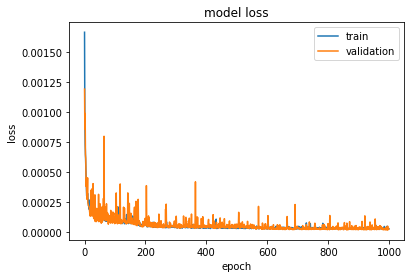

In [27]:
#Show model results
print(history.history.keys())
# Plot graph for Loss with training and validation results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [28]:
#Evaluate the model with the test dataset
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

3656/3656 [==============================] - 0s 25us/sample - loss: 9.0318e-05 - mean_squared_error: 9.0318e-05 - mean_absolute_error: 0.0035
test loss, test acc: [9.0318243232626e-05, 9.0318244e-05, 0.0035418095]


In [30]:
#Use test data set to predict values
predictions = model.predict(X_test)
ynew = scaler_y.inverse_transform(predictions) 
Xnew = scaler_x.inverse_transform(X_test)

In [34]:
#Use R2_Score to check how accurate the predicted values are
score = r2_score(scaler_y.inverse_transform(y_test), ynew)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 96.73 %
